# Building a linear regression model

To build a linear regression model in python, we’ll follow five steps:

* Reading and understanding the data
* Visualizing the data
* Performing simple linear regression
* Residual analysis
* Predictions on the test set


NumPy — used to perform mathematical operations mainly using multi-dimensional arrays.
pandas — used for data manipulation and analysis.
matplotlib — it is a plotting library as a component of NumPy
statsmodels — it is used to explore data, estimate statistical models and perform statistical tests.





![img](https://github.com/LuWidme/uk259/blob/main/img/1_N1-K-A43_98pYZ27fnupDA%20(1).jpg?raw=1)

[Adevertising Dataset Kaggle](https://www.kaggle.com/datasets/bumba5341/advertisingcsv)
Adapted from [here](https://towardsdatascience.com/linear-regression-explained-1b36f97b7572)

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

## 1. Import the Dataset


In [35]:
data = sns.load_dataset("tips")

## 2. Descriptive Statistics
It is a good practice beforehand to get apprised with the descriptive statistics as it helps us to understand the dataset (eg. — are there any outliers present, etc.)

We can perform descriptive statistics using the following command:

In [36]:
print(data.head())
data.describe()


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


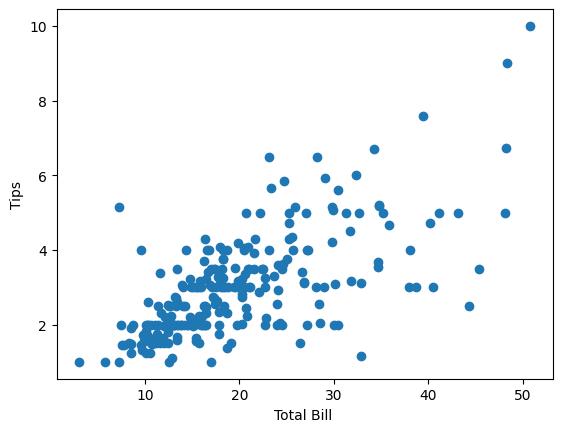

In [37]:
y=data["tip"]
x1= data ["total_bill"]
plt.scatter(x1,y)
plt.xlabel("Total Bill ")

plt.ylabel("Tips")
plt.show()

## 3. Create Your First Linear Regression
When performing simple linear regression, the four main components are:

* Dependent Variable — Target variable / will be estimated and predicted
* Independent Variable — Predictor variable / used to estimate and predict
* Slope — Angle of the line / denoted as m
* Intercept — Where function crosses the y-axis / denoted as c

The last two, slope and intercept, are the coefficients/parameters of a linear regression model, so when we calculate the regression model, we’re just calculating these two. In the end, we’re trying to find the best-fit line describing the data, out of an infinite number of lines. To find the slope of a line, we can choose a random part of the line, and divide the change in x by the change in y.

* Δy — Change in y
* Δx — Change in x


In [38]:
Δ𝑦 = ((np.mean(x1) * np.mean(y)) - np.mean(x1*y))
Δ𝑥 = ((np.mean(x1)**2) - np.mean(x1*y))

# Slope
m = Δ𝑦 / Δ𝑥

# Intercept
c = np.mean(y) - m * np.mean(x1)
print(m,c)

-0.0255947742554408 3.50469542339012


## Prediction With Best Fit Line
If we have a new value (x), we can calculate the prediction (y) with the data we already have.


In [39]:

new_x_value = 90
y_predicted = (m * new_x_value) + c
y_predicted

1.201165740400448

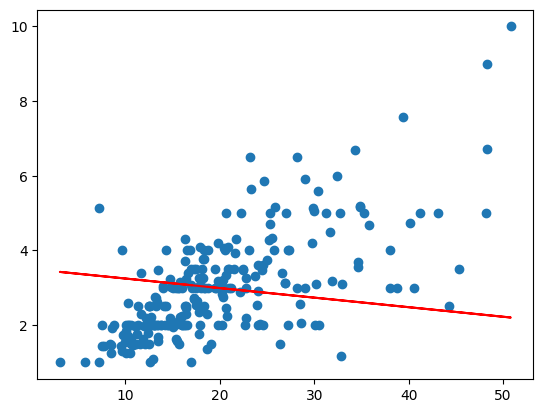

In [40]:
yhat=m*x1+c

plt.scatter(x1,y)
fig=plt.plot(x1,yhat, c="red")
plt.show()

 ## 4. Perform Regression with statsmodels


In [41]:

formula = 'tip~total_bill+smoker+size'

#Fit model using Ordinary least squares method
result =ols(formula=formula, data=data[["tip","total_bill","smoker", "size"]]).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     70.57
Date:                Fri, 24 May 2024   Prob (F-statistic):           9.41e-33
Time:                        07:54:37   Log-Likelihood:                -347.80
No. Observations:                 244   AIC:                             703.6
Df Residuals:                     240   BIC:                             717.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6256      0.207      3.026      0.003       0.218       1.033
smoker[T.No]     0.0834      0.138      0.605      0.546      -0.188       0.355
total_bill       0.0939      0.009     10.062      0.000       0.076       0.112
size             0.1803      0.088      2.054      0.041       0.007       0.353
==============================================================================
Omnibus:                       26.545   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.452
Skew:                           0.584   Prob(JB):                     1.83e-11
Kurtosis:                       4.871   Cond. No.                         73.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It’d create 3 tables and we are mostly interested in the 2nd table which contains the coefficients, p-values, etc.

From the summary table, we can say that the intercept (const) coefficient is 6.97
 and the independent variable coefficient is 0.055 (signifies if independent variable increases by 1 units, the dependent variable increases by 0.055 units)

If the p-value (Prob) of the independent variable/s is greater than 0.050, we say that the variable is not significant and we may drop the variable.
And finally, the R-squared, R² is nothing but the goodness of the fit of the model. In other words, how well our model fitted the observation. R² ranges between 0 and 1. There is no clear universal range for the best R² but, it depends on a case-to-case basis.

Adjusted R² on the other hand, is a modified version of R-squared that has been adjusted for the number of predictors (inputs) in the model. The adjusted R-squared increases when the new independent term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected.



5. Plot the Regression Line
To plot the regression line on the graph, simply define the linear regression equation, i.e., y_hat = b0 + (b1*x1)

b0 = coefficient of the bias variable

b1 = coefficient of the input/s variables

and finally, plot the regression line using matplotlib.pyplot() as shown below:

Intercept     0.920270
total_bill    0.105025
dtype: float64


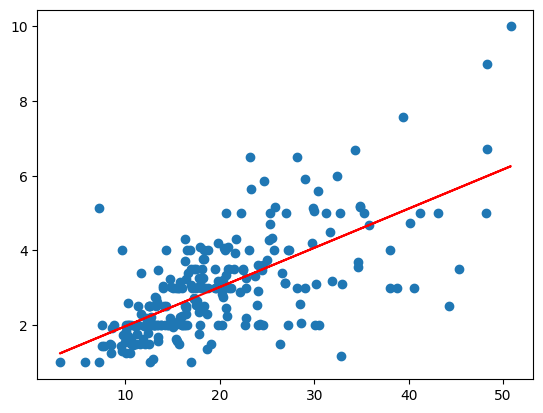

In [42]:
formula = 'tip~total_bill'

#Fit model using Ordinary least squares method
result =ols(formula=formula, data=data[["tip","total_bill"]]).fit()
result.summary()




print(result.params)
m=result.params[1]
c=result.params[0]
yhat=m*x1+c

plt.scatter(x1,y)
fig=plt.plot(x1,yhat, c="red")
plt.show()